In [220]:
#Dataset Linki: https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores 

In [221]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [222]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [223]:
import numpy as np

In [224]:
import pandas as pd

In [225]:
import math

In [226]:
import time

In [227]:
import datetime

In [228]:
import matplotlib.pyplot as plt

In [229]:
import seaborn as sns

In [230]:
data = pd.read_csv('/content/NetflixOriginals.csv', encoding='latin1')
print(data)

                                           Title                  Genre  \
0                                Enter the Anime            Documentary   
1                                    Dark Forces               Thriller   
2                                        The App  Science fiction/Drama   
3                                 The Open House        Horror thriller   
4                                    Kaali Khuhi                Mystery   
..                                           ...                    ...   
579        Taylor Swift: Reputation Stadium Tour           Concert Film   
580  Winter on Fire: Ukraine's Fight for Freedom            Documentary   
581                      Springsteen on Broadway           One-man show   
582    Emicida: AmarElo - It's All For Yesterday            Documentary   
583     David Attenborough: A Life on Our Planet            Documentary   

              Premiere  Runtime  IMDB Score                  Language  
0       August 5, 2019     

In [231]:
data["Premiere_Date"] = pd.to_datetime(data.Premiere)
print(data)

                                           Title                  Genre  \
0                                Enter the Anime            Documentary   
1                                    Dark Forces               Thriller   
2                                        The App  Science fiction/Drama   
3                                 The Open House        Horror thriller   
4                                    Kaali Khuhi                Mystery   
..                                           ...                    ...   
579        Taylor Swift: Reputation Stadium Tour           Concert Film   
580  Winter on Fire: Ukraine's Fight for Freedom            Documentary   
581                      Springsteen on Broadway           One-man show   
582    Emicida: AmarElo - It's All For Yesterday            Documentary   
583     David Attenborough: A Life on Our Planet            Documentary   

              Premiere  Runtime  IMDB Score                  Language  \
0       August 5, 2019    

#Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

---




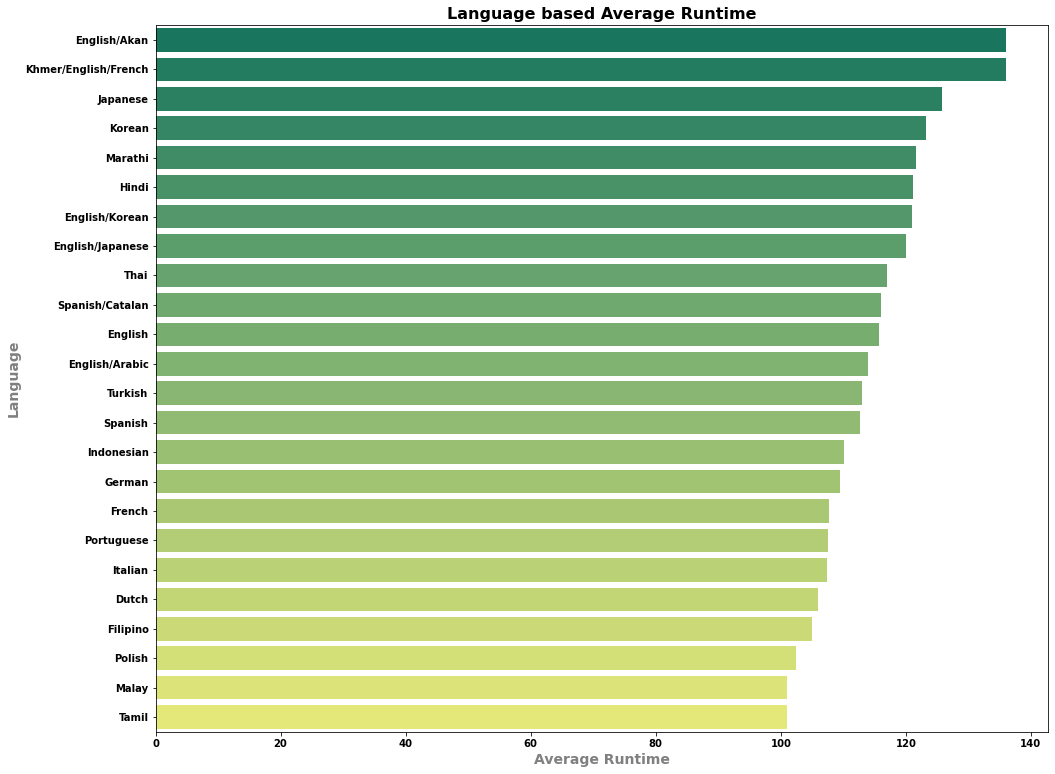

In [260]:
runtime_greater_100 = data[data.Runtime > 100]

runtime_sorted=runtime_greater_100.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False)

plt.figure(figsize=(16,13))
sns.barplot(x = "Runtime", y = "Language", data=runtime_sorted.reset_index(), palette="summer")
plt.title("Language based Average Runtime", weight="bold", color="black", fontsize=16)
plt.xlabel("Average Runtime", weight="bold", color="gray", fontsize=14)
plt.ylabel("Language", weight="bold", color="gray", fontsize=14)
plt.xticks(fontsize=10, weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.show()

# ***2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.***

In [261]:
documentary=data.loc[(data["Genre"] == "Documentary")].head(5)
print(documentary)
genre_premiere=data.loc[(data["Genre"] == "Documentary") & (data["Premiere_Date"] > "2019-01-01") & (data["Premiere_Date"] < "2020-06-30")].sort_values(by="IMDB Score", ascending=False)
print(genre_premiere)

                                Title        Genre            Premiere  \
0                     Enter the Anime  Documentary      August 5, 2019   
10               Searching for Sheela  Documentary      April 22, 2021   
15                     After the Raid  Documentary   December 19, 2019   
20  Hello Privilege. It's Me, Chelsea  Documentary  September 13, 2019   
30                        After Maria  Documentary        May 24, 2019   

    Runtime  IMDB Score          Language Premiere_Date  
0        58         2.5  English/Japanese    2019-08-05  
10       58         4.1           English    2021-04-22  
15       25         4.3           Spanish    2019-12-19  
20       64         4.4           English    2019-09-13  
30       37         4.6   English/Spanish    2019-05-24  
                                                 Title        Genre  \
577                             Dancing with the Birds  Documentary   
572                  Disclosure: Trans Lives on Screen  Documenta

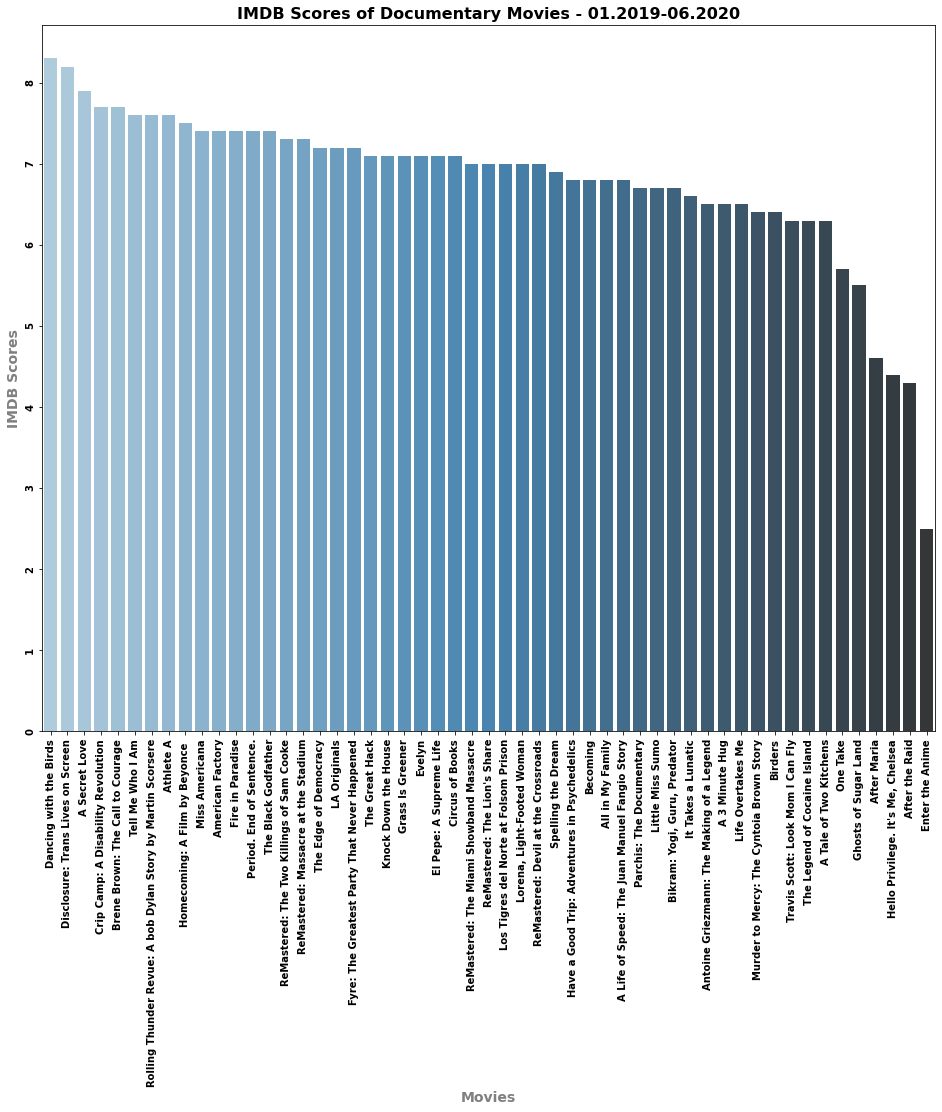

In [264]:
plt.figure(figsize=(16,13))

sns.barplot(x = "Title", y = "IMDB Score", data=genre_premiere, palette="Blues_d")
plt.title("IMDB Scores of Documentary Movies - 01.2019-06.2020", weight="bold", color="black", fontsize=16)
plt.xlabel("Movies", weight="bold", color="gray", fontsize=14)
plt.ylabel("IMDB Scores", weight="bold", color="gray", fontsize=14)
plt.xticks(rotation = 90, fontsize=10, weight="bold")
plt.yticks(rotation = 90, fontsize=10, weight="bold")
plt.show()

# ***İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?***

In [265]:
english_movies=data[data['Language'].str.contains("English")].sort_values(by="IMDB Score", ascending=False)
english_movies.head(1)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_Date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04


# ***'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?***

In [267]:
hindi_movies=data[data['Language'].str.contains("Hindi")]
runtime_mean=int(hindi_movies['Runtime'].mean())
print(runtime_mean)

111


# ***'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.***

In [268]:
genre_data=data["Genre"].value_counts()
genre_data

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64

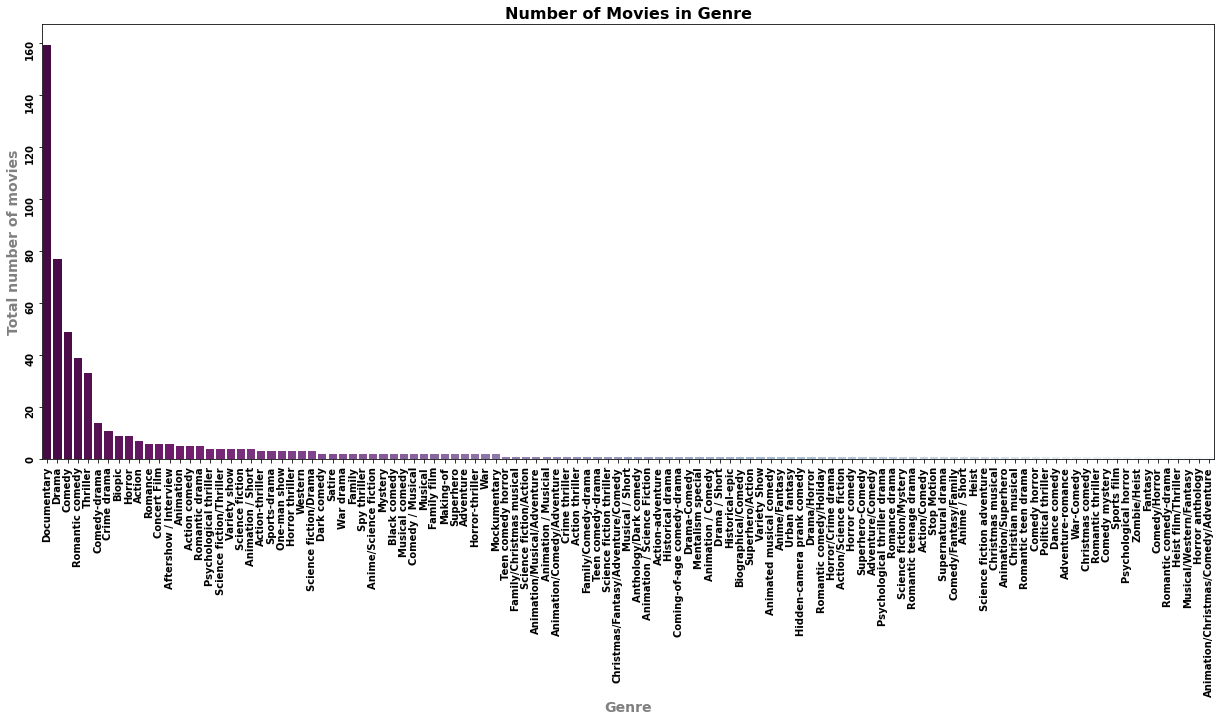

In [284]:
plt.figure(figsize=(21,8))

sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index, palette="BuPu_r")
plt.title("Number of Movies in Genre", weight="bold", color="black", fontsize=16)
plt.xlabel("Genre", weight="bold", color="gray", fontsize=14)
plt.ylabel("Total number of movies", weight="bold", color="gray", fontsize=14)
plt.xticks(rotation = 90, fontsize=10, weight="bold")
plt.yticks(rotation = 90, fontsize=10, weight="bold")
plt.show()

# ***Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.***

In [285]:
data["Language"].value_counts(sort=True)[0:3]

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

# ***IMDB puanı en yüksek olan ilk 10 film hangileridir?***

In [286]:
IMDB_data=data.sort_values(by="IMDB Score", ascending=False).reset_index()
IMDB_top10=IMDB_data.head(10)
IMDB_top10

,index,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_Date
0,583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04
1,582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020-12-08
2,581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
3,580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015-10-09
4,579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31
5,578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,2020-05-20
6,577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English,2019-10-23
7,576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English,2017-11-24
8,573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English,2019-11-15
9,571,13th,Documentary,"October 7, 2016",100,8.2,English,2016-10-07


# ***IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.***

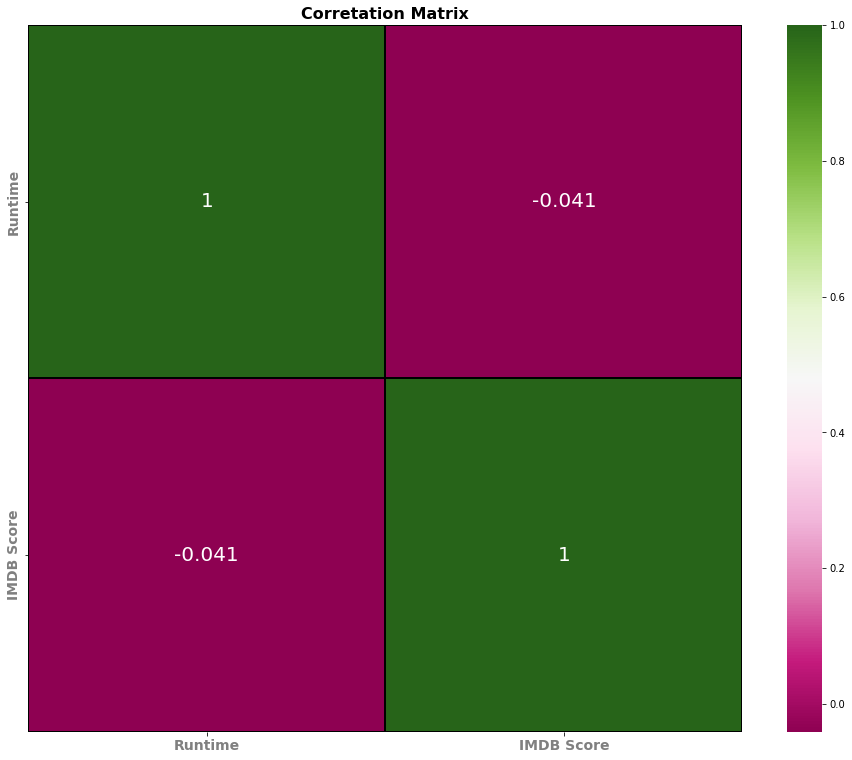

We can say that there is no linear relationship between runtime and IMDB score, or there is a very weak relationship.


In [309]:
def correlation_matrix(df,columns):
    plt.figure(figsize=(16,13))
    plt.xticks(fontsize=14, weight="bold", color="gray")
    plt.yticks(rotation = 90, fontsize=14, weight="bold", color="gray")
    sns.heatmap(df[columns].corr(), annot = True, linewidths=1, annot_kws={'size': 20}, linecolor='black', cmap = "PiYG")
    plt.title("Corretation Matrix", weight="bold", color="black", fontsize=16)
    plt.show(block=True)
    
    
correlation_matrix(data,["Runtime","IMDB Score"])
print("We can say that there is no linear relationship between runtime and IMDB score, or there is a very weak relationship.")

# ***IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.***

In [310]:
IMDB_Genre=data.groupby("Genre")["IMDB Score"].max().sort_values(ascending = False).reset_index()
IMDB_Genre_top10=IMDB_Genre.head(10)
IMDB_Genre_top10

,Genre,IMDB Score
0,Documentary,9.0
1,One-man show,8.5
2,Concert Film,8.4
3,Animation/Christmas/Comedy/Adventure,8.2
4,Drama,7.9
5,Animation / Short,7.8
6,Crime drama,7.8
7,Musical / Short,7.7
8,Making-of,7.7
9,War drama,7.7


<Figure size 2160x1440 with 0 Axes>

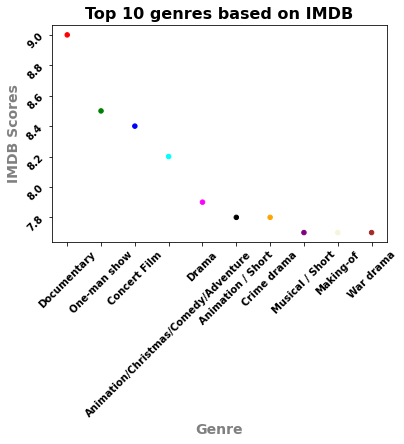

In [321]:
plt.figure(figsize=(30,20))

colors = np.array(["red","green","blue","cyan","magenta","black","orange","purple","beige","brown"])
IMDB_Genre_top10.plot(kind="scatter", x='Genre', y='IMDB Score', color=colors)
plt.title("Top 10 genres based on IMDB", weight="bold", color="black", fontsize=16)
plt.xlabel("Genre", weight="bold", color="gray", fontsize=14)
plt.ylabel("IMDB Scores", weight="bold", color="gray", fontsize=14)
plt.xticks(rotation = 45, fontsize=10, weight="bold")
plt.yticks(rotation = 45, fontsize=10, weight="bold")
plt.show()

# ***'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.***

In [322]:
runtime_movies=data.sort_values(by="Runtime", ascending=False)
runtime_top10=runtime_movies.head(10)
runtime_top10

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_Date
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English,2019-11-27
328,Da 5 Bloods,War drama,"June 12, 2020",155,6.5,English,2020-06-12
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
247,Citation,Drama,"November 6, 2020",151,6.2,English,2020-11-06
284,The Forest of Love,Drama,"October 11, 2019",151,6.3,Japanese,2019-10-11
509,Raat Akeli Hai,Thriller,"July 31, 2020",149,7.3,Hindi,2020-07-31
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English,2020-06-05
543,Ludo,Anthology/Dark comedy,"November 12, 2020",149,7.6,Hindi,2020-11-12
194,Army of the Dead,Zombie/Heist,"May 21, 2021",148,5.9,English,2021-05-21
5,Drive,Action,"November 1, 2019",147,3.5,Hindi,2019-11-01


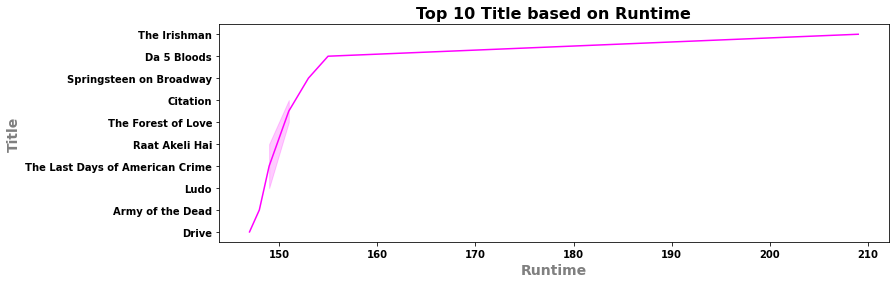

In [327]:
plt.figure(figsize=(12,4))

sns.lineplot(x='Runtime', y='Title', data=runtime_top10, color="magenta")
plt.title("Top 10 Title based on Runtime", weight="bold", color="black", fontsize=16)
plt.xlabel("Runtime", weight="bold", color="gray", fontsize=14)
plt.ylabel("Title", weight="bold", color="gray", fontsize=14)
plt.xticks(fontsize=10, weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.show()

# ***Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.***

In [326]:
year=data["Premiere_Date"].dt.year.value_counts().reset_index()
year

,index,Premiere_Date
0,2020,183
1,2019,125
2,2018,99
3,2021,71
4,2017,66
5,2016,30
6,2015,9
7,2014,1


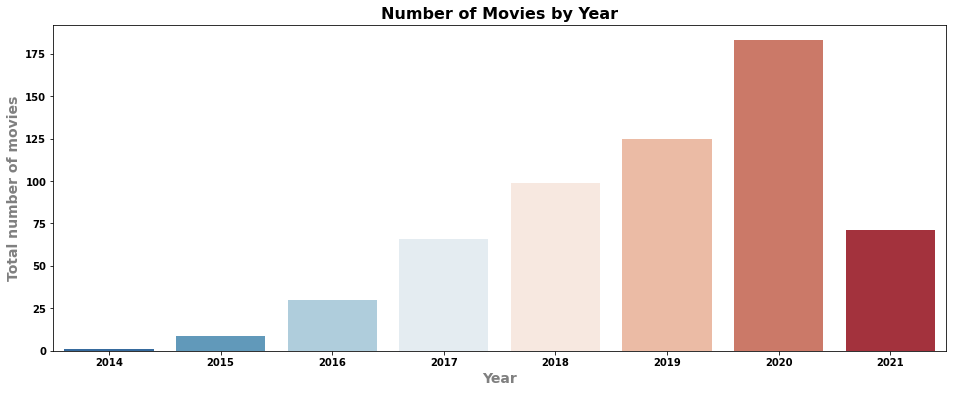

In [333]:
plt.figure(figsize=(16,6))

sns.barplot(x="index", y= "Premiere_Date", data=year, palette="RdBu_r")
plt.title("Number of Movies by Year", weight="bold", color="black", fontsize=16)
plt.xlabel("Year", weight="bold", color="gray", fontsize=14)
plt.ylabel("Total number of movies", weight="bold", color="gray", fontsize=14)
plt.xticks(fontsize=10, weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.show()

# ***Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir. Görselleştiriniz.***

In [332]:
IMDB_Language=data.groupby("Language").agg({"IMDB Score": "mean"}).sort_values(by="IMDB Score", ascending=True).reset_index()
IMDB_Language

,Language,IMDB Score
0,Malay,4.200000
1,English/Japanese,4.400000
2,Norwegian,5.100000
3,Filipino,5.100000
4,Polish,5.166667
5,Thai,5.450000
6,Swedish,5.500000
7,Italian,5.542857
8,Spanish/Basque,5.600000
9,German,5.640000


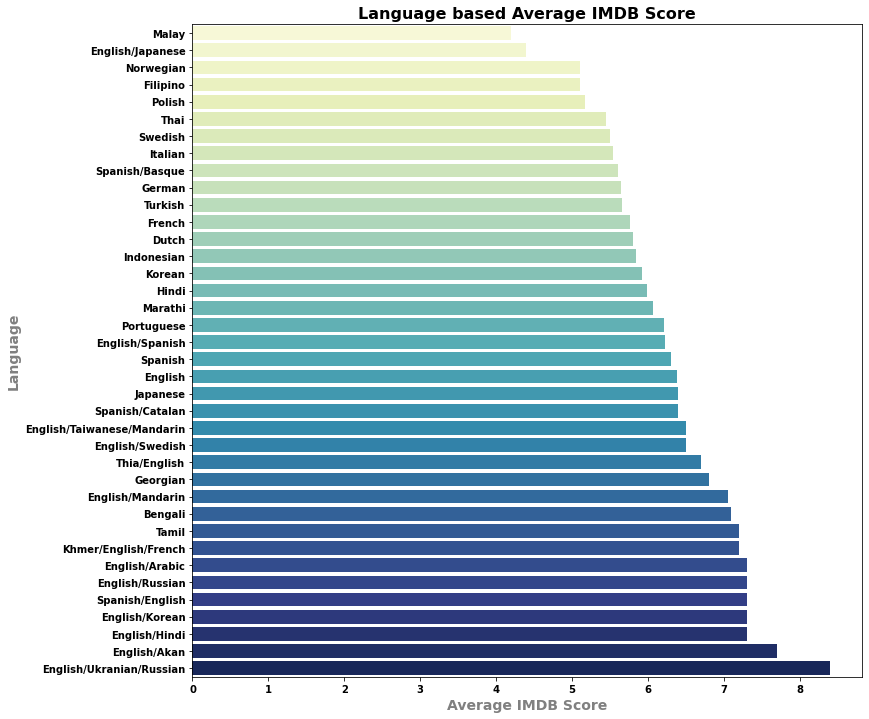

In [340]:
plt.figure(figsize=(12,12))
sns.barplot(x = "IMDB Score", y = "Language", data=IMDB_Language, palette="YlGnBu")
plt.title("Language based Average IMDB Score", weight="bold", color="black", fontsize=16)
plt.xlabel("Average IMDB Score", weight="bold", color="gray", fontsize=14)
plt.ylabel("Language", weight="bold", color="gray", fontsize=14)
plt.xticks(fontsize=10, weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.show()

# ***Hangi yılın toplam "runtime" süresi en fazladır?***

In [342]:
year_data=data["Premiere_Date"].dt.year
year_data

year_runtime=data.groupby(year_data).agg({"Runtime": "sum"}).sort_values(by="Runtime", ascending=False).reset_index()
year_runtime.head(1)

,Premiere_Date,Runtime
0,2020,17384


# ***Her bir dilin en fazla kullanıldığı "Genre" nedir?***

In [343]:
x=data.groupby(["Language","Genre"]).agg({'Language': 'count' })
x.rename(columns = {'Language':'Count' }, inplace = True )
x.sort_values("Count", ascending=False)

Count
Language Genre                           
English  Documentary                  120
         Drama                         35
         Comedy                        30
         Romantic comedy               27
         Thriller                      14
...                                   ...
         Satire                         1
         Science fiction adventure      1
         Science fiction/Action         1
         Science fiction/Mystery        1
Turkish  Romance                        1

[204 rows x 1 columns]

# ***Veri setinde outlier veri var mıdır? Açıklayınız.***

In [365]:
def outlier_detect(data):
    columns= ["Runtime", "IMDB Score"]
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3- Q1
        
        min_limit = Q1 - IQR*1.5
        max_limit = Q3 + IQR*1.5
        
        total_outlier = (data[col] < min_limit).sum() + (data[col] > max_limit).sum()
        
        if total_outlier > 0:
            print(f"{col} : Outlier value found in a variable.")
            sns.boxplot(data[col], palette="YlGnBu")
            plt.title("{} Boxplot".format(col), weight="bold", color="black", fontsize=16)
            plt.xlabel("{} ".format(col), weight="bold", color="gray", fontsize=14)
            plt.xticks(fontsize=10, weight="bold")
            plt.show()
            print(f"{col} : The total outlier in a variable {total_outlier}.")
            print("*"*50)
        else:
            print(f"{col} : Outlier value doesn't found in a variable.")
    return data

Runtime : Outlier value found in a variable.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


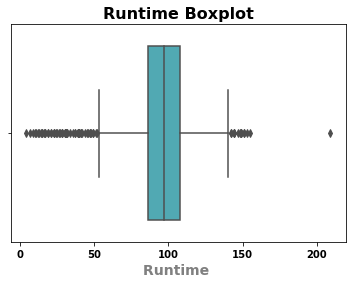

Runtime : The total outlier in a variable 75.
**************************************************
IMDB Score : Outlier value found in a variable.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


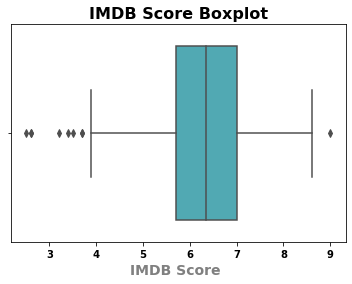

IMDB Score : The total outlier in a variable 9.
**************************************************


,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_Date
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30
...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015-10-09
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020-12-08


In [366]:
outlier_detect(data)